Samantha M. Garcia
Data Management & Analysis
Assignment 3

##About the Data

Name: DSNY Salt Usage

Link to Data: https://catalog.data.gov/dataset/dsny-salt-use-by-day-2015-2017

Source/Origin: This dataset aims to record the amount of salt used by each borough on a given day of a storm from 2016 through 2019. It is difficult to measure such a large amount accurately, so the New York City Department of Sanitation (DSNY) records the number of times a piece of salt-spreading equipment reloads and multiplies that by the capacity of a piece of salt-spreading equipment which is 16 tons.

Motivation: I was interested in this dataset because I had never thought about the amount of salt used during snowstorms and I thought it was cool that this data was collected

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#file_name = "/Users/samanthagarcia/Desktop/DMAhomework3/DSNY_Salt_Usage.csv"
file_name = "DSNY_Salt_Usage.csv"
    
try:
    my_file = open(file_name, "r")
    #this_file = np.genfromtxt(file_name, delimiter=", ")
        
except:
    print("File not found")
    
else:
    print(my_file.readline())
    print(my_file.readline())
    print(my_file.readline())
    print(my_file.readline())
        
    my_file.close()
          

DSNY Storm # ,Date of Report ,Manhattan,Bronx,Brooklyn,Queens,Staten Island ,Total Tons 

Storm 1,01/19/2016 12:00:00 AM,1111,2059,2690,6625,2931,15416

Storm 2,01/23/2016 12:00:00 AM,2919,4567,5521,9253,4264,26524

Storm 2,01/24/2016 12:00:00 AM,6582,8167,12290,17133,5411,49583



#Format
The fields of this dataset are "DSNY Storm #", "Date of Report", "Manhattan," "Bronx," "Brooklyn", "Queens", "Staten Island", and "Total Tons'. The first column is a string, the second column should be a datetime object, and the other six columns should be numeric, but they are actually all strings.
Each record is a day of a storm/weather condition.

#Questions
- On average, which borough uses the most salt?
- On average, which borough uses the least salt?
- Is it consistently the same borough that uses the most/least salt?
- What percentage of the total salt used does each individual borough use?

In [3]:
f = open("DSNY_Salt_Usage.csv", "r")
h = f.readline()

print(h)
print(type(h))

header = h.split(",")
header = [header[i].strip() for i in range(len(header))]

#renaming headers bc spaces made indexing difficult
for i in range(len(header)):
    h_split = header[i].split(" ")
    if len(h_split) > 1:
        new_h = h_split[0] + h_split[1]
        header[i] = new_h

print(header)

DSNY Storm # ,Date of Report ,Manhattan,Bronx,Brooklyn,Queens,Staten Island ,Total Tons 

<class 'str'>
['DSNYStorm', 'Dateof', 'Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'StatenIsland', 'TotalTons']


In [4]:
all = np.genfromtxt("DSNY_Salt_Usage.csv", delimiter=",", skip_header=1, names=header, dtype=None, encoding='UTF-8')

all = np.reshape(all, (106, 1))

In [5]:
max_total = all["TotalTons"].max()
min_total = all["TotalTons"].min()
mean_total = all["TotalTons"].mean()

In [6]:
print("Maximum amount of salt used in NYC in tons: " + str(max_total))
print("Minimum amount of salt used in NYC intons: " + str(min_total))
print("Mean amount of salt used in NYC in tons: " + str(mean_total))

Maximum amount of salt used in NYC in tons: 53561
Minimum amount of salt used in NYC intons: 40
Mean amount of salt used in NYC in tons: 13499.207547169812


In [7]:
max_manhattan = all["Manhattan"].max()
min_manhattan = all["Manhattan"].min()
mean_manhattan = all["Manhattan"].mean()


print("Maximum amount of salt used in Manhattan in tons: " + str(max_manhattan))
print("Minimum amount of salt used in Manhattan in tons: " + str(min_manhattan))
print("Mean amount of salt used in Manhattan in tons: "+ str(mean_manhattan))

Maximum amount of salt used in Manhattan in tons: 7091
Minimum amount of salt used in Manhattan in tons: 0
Mean amount of salt used in Manhattan in tons: 1531.9056603773586


In [8]:
var_total = all["TotalTons"].var()
std_total = all["TotalTons"].std()

var_manhattan = all["Manhattan"].var()
std_manhattan = all["Manhattan"].std()


print("NYC Variance \t\t\t\t" + str(var_total))
print("NYC Standard Deviation \t\t\t" + str(std_total))

print("Manhattan Variance \t\t\t" + str(var_manhattan))
print("Manhattan Standard Deviation \t\t" + str(std_manhattan))

#interquartile range for manhattan
m_25 = np.percentile(all["Manhattan"], 25)
m_75 = np.percentile(all["Manhattan"], 75)
m_iqr = m_75 - m_25

#interquartile range for nyc
t_25 = np.percentile(all["TotalTons"], 25)
t_75 = np.percentile(all["TotalTons"], 75)
t_iqr = t_75 - t_25


print("Interquartile Range NYC \t\t " + str(t_iqr))
print("Interquartile Range Manhattan \t\t " + str(m_iqr))

NYC Variance 				187630337.8814525
NYC Standard Deviation 			13697.822377350807
Manhattan Variance 			3038663.519401922
Manhattan Standard Deviation 		1743.1762731869437
Interquartile Range NYC 		 18108.0
Interquartile Range Manhattan 		 2189.0


I used Google Sheets to confirm my summary statistics. The min, max, and mean for Manhattan and NYC were the same. The variances differed. Google sheets offers different ways to calculate the variance and after trying a few of them, the function that returned the same results that I got is the population variance (VAR.P). Similarly, the standard deviation function that yielded the same results was the one for a population (STDEV.P).

In [9]:
mean_si = all["StatenIsland"].mean()
mean_bk = all["Brooklyn"].mean()
mean_bx = all["Bronx"].mean()
mean_q = all["Queens"].mean()
#mean_manhattan
#mean_total

print("Staten Island Mean \t" + str(mean_si))
print("Brooklyn Mean \t\t" + str(mean_bk))
print("Bronx Mean \t\t" + str(mean_bx))
print("Queens Mean \t\t" + str(mean_q))

Staten Island Mean 	1585.3396226415093
Brooklyn Mean 		3428.6792452830186
Bronx Mean 		2496.7735849056603
Queens Mean 		4456.509433962264


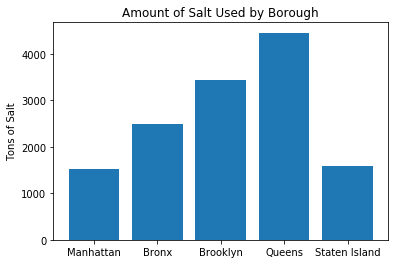

In [10]:
plt.title("Amount of Salt Used by Borough")
labels = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]
amt = [mean_manhattan, mean_bx, mean_bk, mean_q, mean_si]
y = np.arange(len(labels))
plt.xticks(y, labels)
plt.ylabel("Tons of Salt")
plt.bar(y, amt)

plt.show()

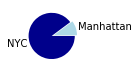

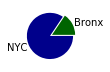

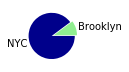

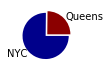

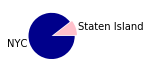

In [11]:
#Manhattan
plt.subplot(1, 5, 1)
label = ["Manhattan", "NYC"]
amounts = [mean_manhattan, mean_total]
explode = (0.1, 0.0)
colors = ["lightblue", "darkblue"]
plt.pie(amounts, explode, labels=label, colors=colors)
plt.show()

#Bronx
plt.subplot(1, 5, 2)
label = ["Bronx", "NYC"]
amounts = [mean_bx, mean_total]
explode = (0.1, 0.0)
colors = ["darkgreen", "darkblue"]
plt.pie(amounts, explode, labels=label, colors=colors)
plt.show()

#Brooklyn
plt.subplot(1, 5, 3)
label = ["Brooklyn", "NYC"]
amounts = [mean_manhattan, mean_total]
explode = (0.1, 0.0)
colors = ["lightgreen", "darkblue"]
plt.pie(amounts, explode, labels=label, colors=colors)
plt.show()

#Queens
plt.subplot(1, 5, 4)
label = ["Queens", "NYC"]
amounts = [mean_q, mean_total]
explode = (0.1, 0.0)
colors = ["darkred", "darkblue"]
plt.pie(amounts, explode, labels=label, colors=colors)
plt.show()

#Staten Island
plt.subplot(1, 5, 5)
label = ["Staten Island", "NYC"]
amounts = [mean_si, mean_total]
explode = (0.1, 0.0)
colors = ["pink", "darkblue"]
plt.pie(amounts, explode, labels=label, colors=colors)
plt.show()

On average, Queens uses the most salt during storms. I think this makes sense because Queens is the largest borough. Manhattan uses the least amount of salt, on average. Manhattan is the smallest borough so this also makes sense. Some of my questions were answered.